In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = '/content/auto-mpg.csv'
df = pd.read_csv(file_path)


In [3]:
# Display initial dataset information
print("Initial Dataset Info:")
print(df.info())
print("\nFirst Five Rows:")
print(df.head())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None

First Five Rows:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0       

In [4]:
# Data Cleaning

# Check for NaNs and duplicates
print("\nNumber of Missing Values:")
print(df.isnull().sum())
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Missing Values:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Number of Duplicate Rows: 0


In [5]:
# Fix inconsistent data types
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Handle NaNs in horsepower
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

# Convert 'origin' to categorical
df['origin'] = df['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Asia'})

# Summary after cleaning
print("\nDataset Info After Cleaning:")
print(df.info())


Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


<ipython-input-5-cb975deebe7d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


**# Data Visualization**

<ipython-input-6-bdb202d1b630>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='model year', y='mpg', marker='o', ci=None)


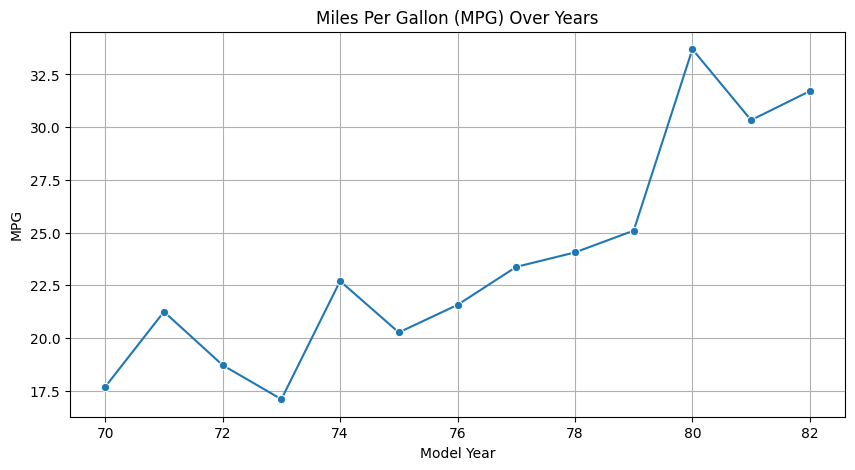

In [6]:
# 1. MPG over time (Model Year)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='model year', y='mpg', marker='o', ci=None)
plt.title('Miles Per Gallon (MPG) Over Years')
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

<ipython-input-7-4b9c7aed74b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cylinders', y='mpg', palette='viridis')


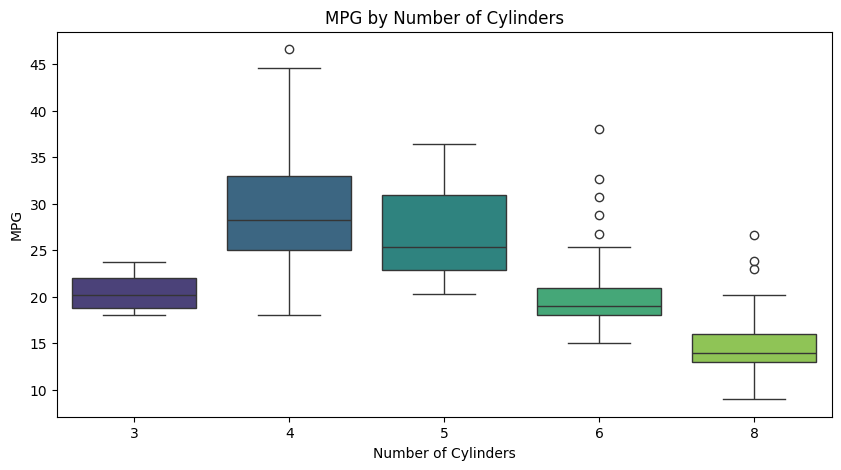

In [7]:
# 2. MPG vs Cylinders
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cylinders', y='mpg', palette='viridis')
plt.title('MPG by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('MPG')
plt.show()

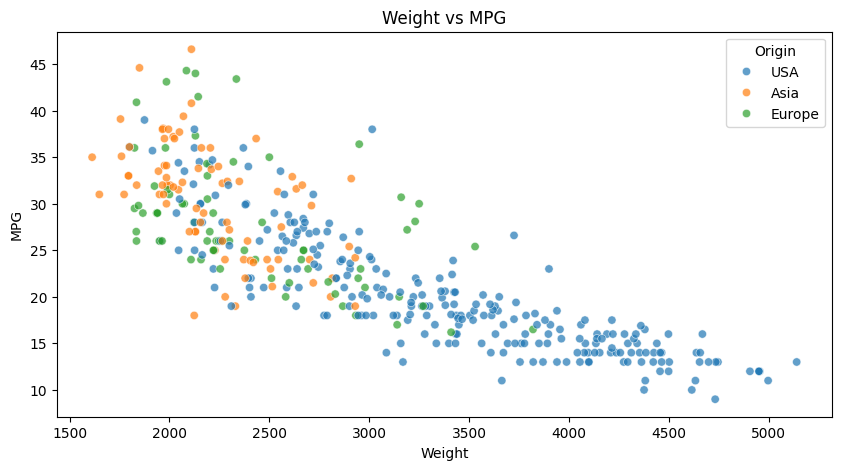

In [8]:
# 3. Weight vs MPG
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='weight', y='mpg', hue='origin', palette='tab10', alpha=0.7)
plt.title('Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend(title='Origin')
plt.show()

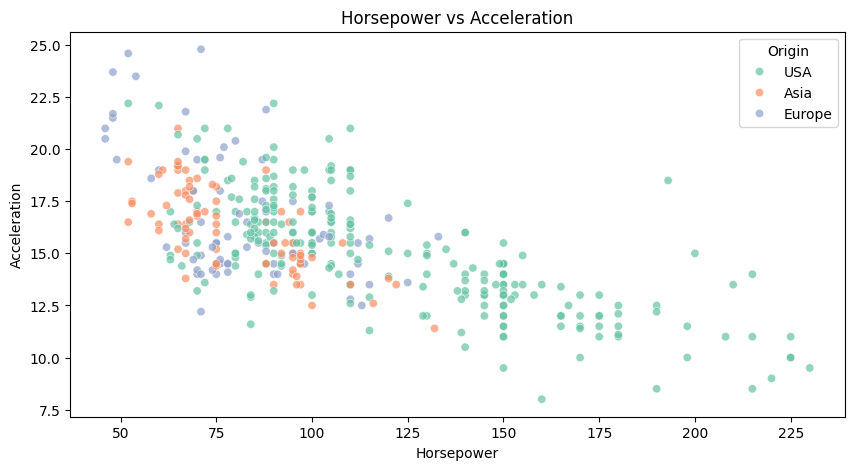

In [9]:
# 4. Horsepower vs Acceleration
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='horsepower', y='acceleration', hue='origin', palette='Set2', alpha=0.7)
plt.title('Horsepower vs Acceleration')
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')
plt.legend(title='Origin')
plt.show()

<ipython-input-10-2ac01a4f6bbd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='origin', y='mpg', palette='coolwarm')


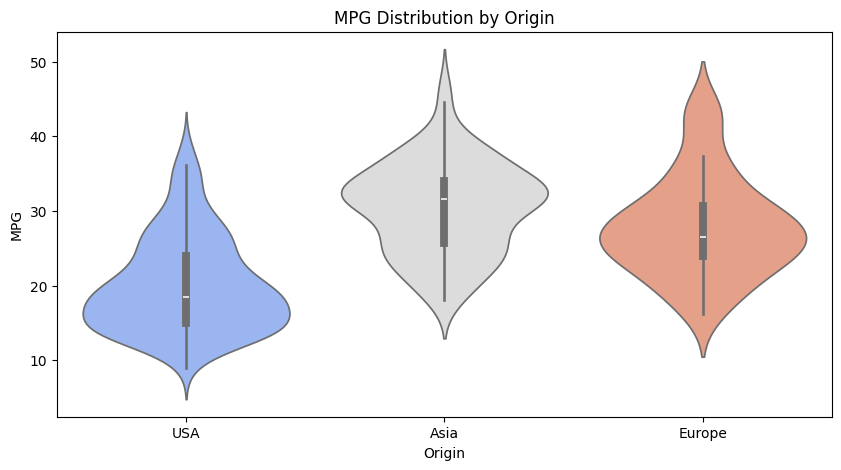

In [10]:
# 5. MPG Distribution by Origin
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='origin', y='mpg', palette='coolwarm')
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()

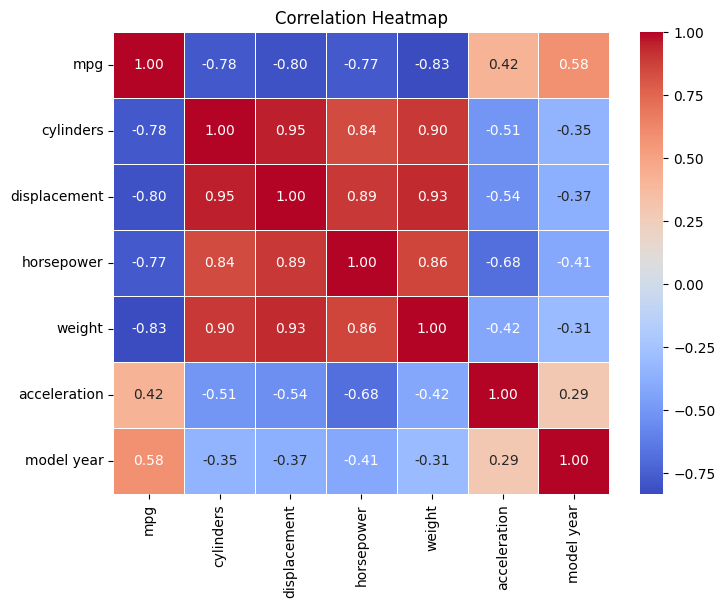

In [12]:
# 6. Correlation Heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Conclusion
print("\nConclusions:")
print("""
1. MPG increases over time, especially after 1973.
2. Cars with more than 4 cylinders generally have lower MPG and higher horsepower.
3. There is a strong negative correlation between MPG and weight.
4. Cars manufactured in the USA tend to have the lowest MPG and highest weight,
   while those from Asia have the highest MPG and lowest weight.
5. Acceleration is negatively correlated with horsepower and positively correlated with MPG.
""")


Conclusions:

1. MPG increases over time, especially after 1973.
2. Cars with more than 4 cylinders generally have lower MPG and higher horsepower.
3. There is a strong negative correlation between MPG and weight.
4. Cars manufactured in the USA tend to have the lowest MPG and highest weight, 
   while those from Asia have the highest MPG and lowest weight.
5. Acceleration is negatively correlated with horsepower and positively correlated with MPG.

